In [1]:
import numpy as np
import json
from utils import make_analysis,hist_plot

In [2]:
path='results/'
with open(path+'true_train.json','r') as f:
   y_train=np.array(json.load(f))
with open(path+'predicted_train.json','r') as f:
   yhat_train=np.array(json.load(f))
with open(path+'true_valid.json','r') as f:
    y_valid=np.array(json.load(f))
with open(path+'predicted_valid.json','r') as f:
    yhat_valid=np.array(json.load(f))
with open(path+'training_history.json','r') as f:
    hist=json.load(f)

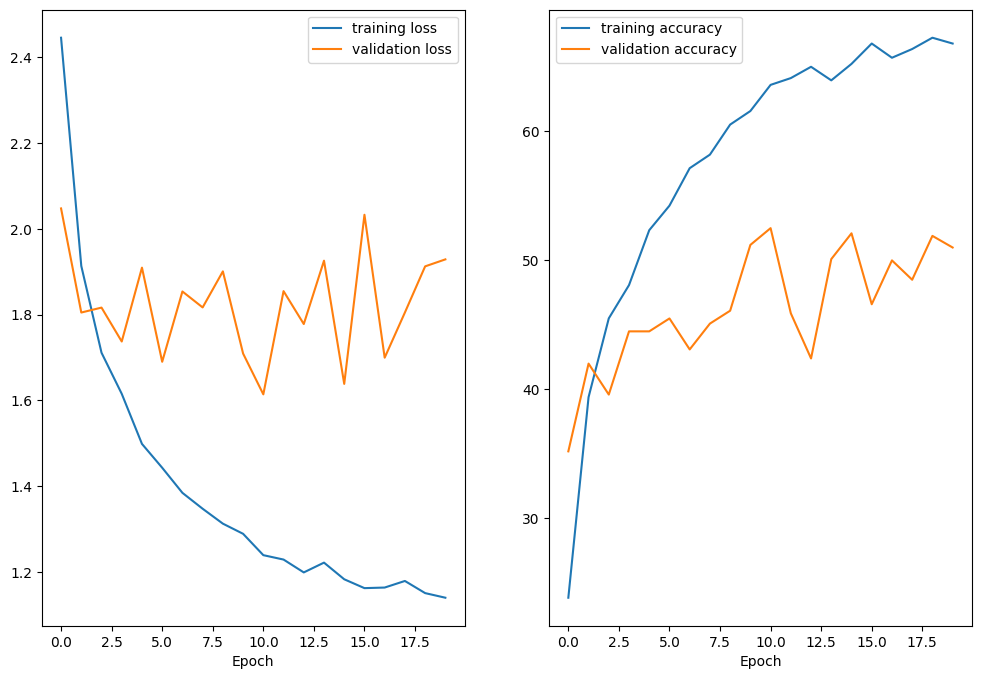

In [3]:
loss=hist['loss']
acc=hist['accuracy']
loss_valid=hist['val_loss']
acc_valid=hist['val_accuracy']
acc=[x*100 for x in acc]
acc_valid=[x*100 for x in acc_valid]
hist_plot(loss,acc,loss_valid,acc_valid)

# VALIDATION

           Accuracy  Precision  Recall  F1 Score  Support
Blues          0.90   0.620690    0.90  0.734694    100.0
Classical      0.69   0.392045    0.69  0.500000    100.0
Country        0.51   0.560440    0.51  0.534031    100.0
Disco          0.62   0.558559    0.62  0.587678    100.0
HipHop         0.11   0.611111    0.11  0.186441    100.0
Jazz           0.53   0.441667    0.53  0.481818    100.0
Metal          0.25   0.581395    0.25  0.349650    100.0
Pop            0.69   0.657143    0.69  0.673171    100.0
Reggae         0.21   0.253012    0.21  0.229508    100.0
Rock           0.59   0.546296    0.59  0.567308    100.0
Average        0.51   0.522236    0.51  0.484430    100.0


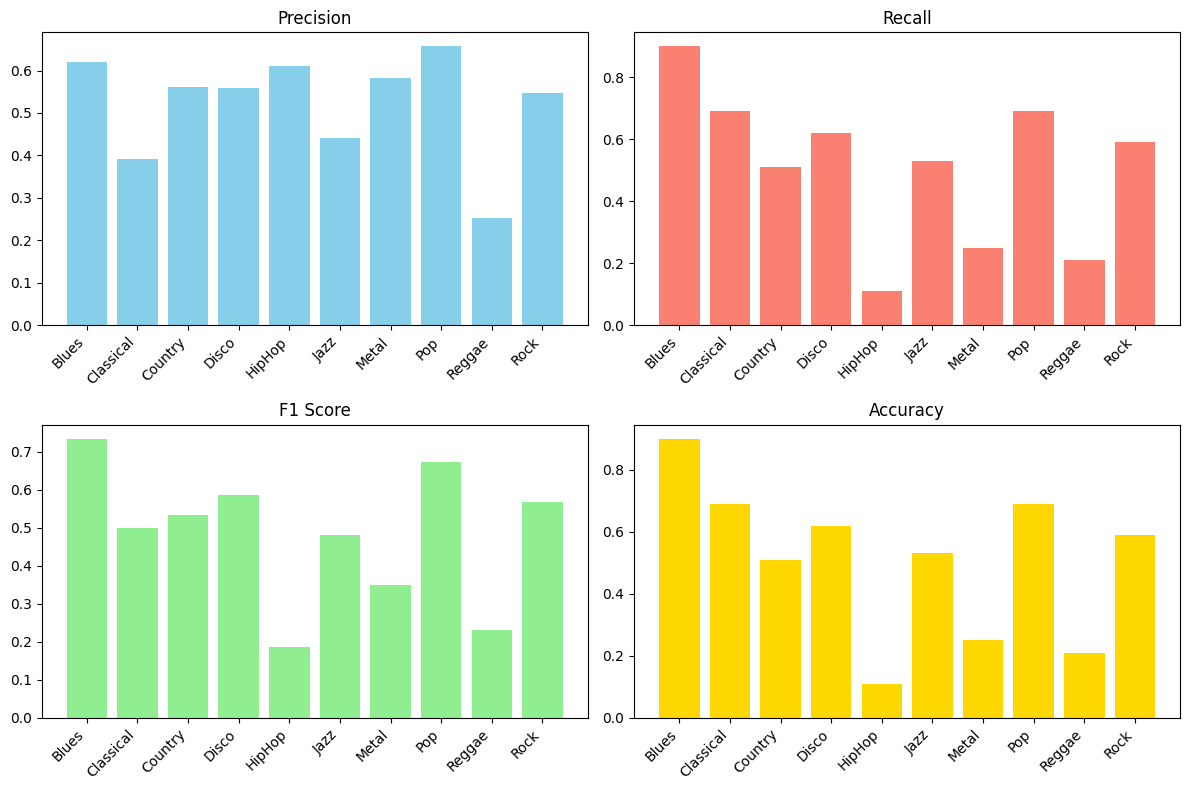

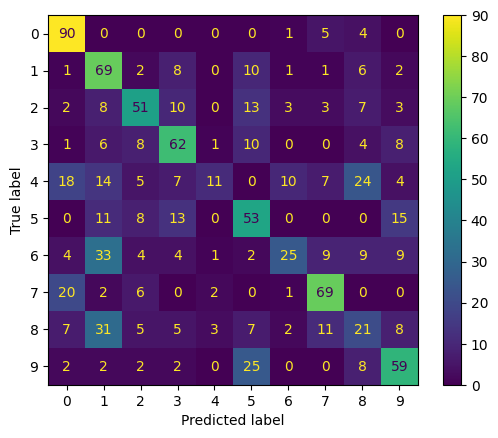

In [4]:
make_analysis(y_valid,yhat_valid)

# TRAIN

           Accuracy  Precision    Recall  F1 Score  Support
Blues      0.992500   0.776908  0.992500  0.871570    400.0
Classical  0.947500   0.806383  0.947500  0.871264    400.0
Country    0.875000   0.808314  0.875000  0.840336    400.0
Disco      0.920000   0.893204  0.920000  0.906404    400.0
HipHop     0.567500   0.982684  0.567500  0.719493    400.0
Jazz       0.845000   0.832512  0.845000  0.838710    400.0
Metal      0.802500   0.963964  0.802500  0.875853    400.0
Pop        0.845570   0.878947  0.845570  0.861935    395.0
Reggae     0.835000   0.814634  0.835000  0.824691    400.0
Rock       0.872500   0.853301  0.872500  0.862794    400.0
Average    0.850307   0.861085  0.850307  0.847305    399.5


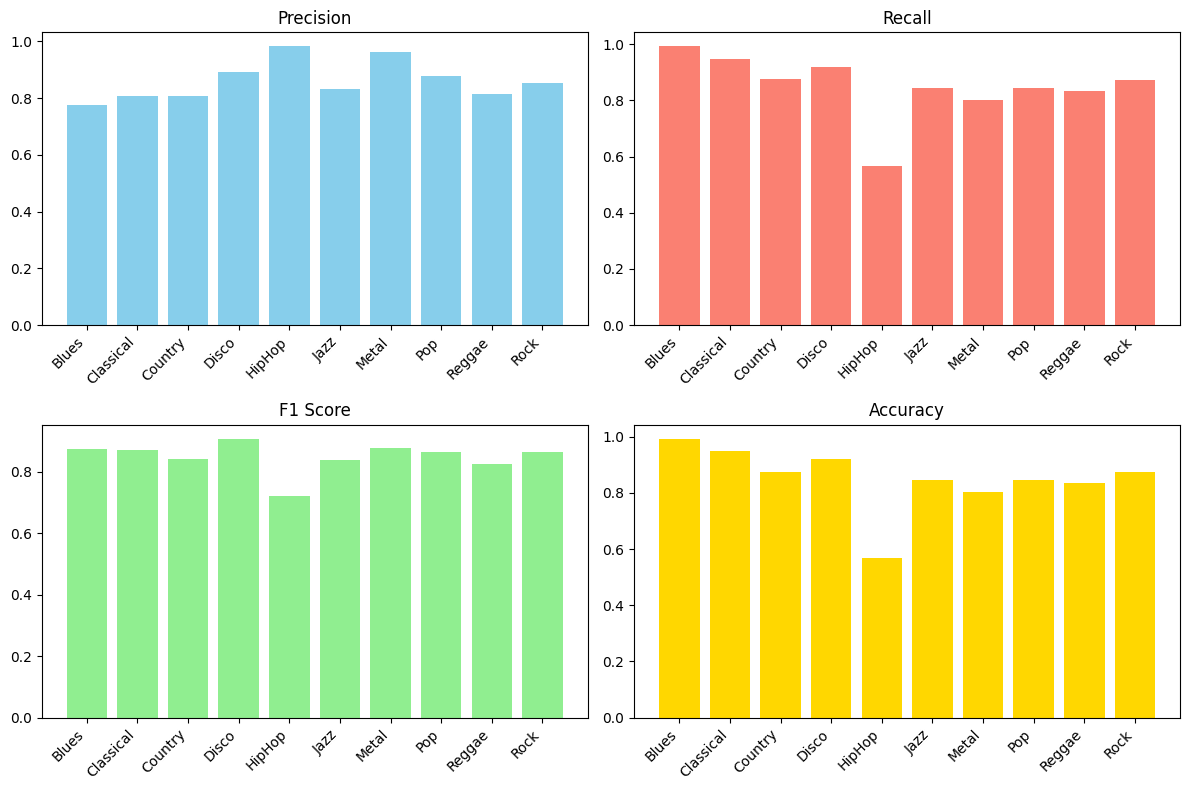

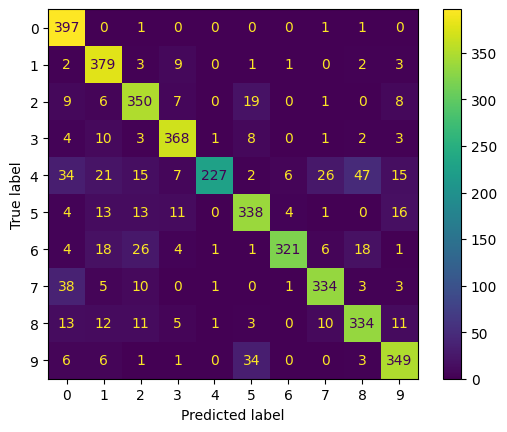

In [5]:
make_analysis(y_train,yhat_train)